In [1]:
# Install Kaggle and the configuration
!pip install kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Download the dataset and remove every credentials.
!kaggle datasets download -d cashutosh/gender-classification-dataset
!ls
!unzip gender-classification-dataset.zip -d ./dataset
!rm -r kaggle.json
!rm -r gender-classification-dataset.zip

In [ ]:
# Installing TensorFlow Lite
!pip install -q git+https://github.com/tensorflow/examples.git#egg=tensorflow-examples[model_maker]

In [4]:
# Configure TensorFlow
import os
import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow_examples.lite.model_maker.core.data_util.image_dataloader import ImageClassifierDataLoader
from tensorflow_examples.lite.model_maker.core.task import image_classifier
from tensorflow_examples.lite.model_maker.core.task.configs import QuantizationConfig
from tensorflow_examples.lite.model_maker.core.task.model_spec import mobilenet_v2_spec
from tensorflow_examples.lite.model_maker.core.task.model_spec import ImageModelSpec

import matplotlib.pyplot as plt

In [5]:
# Import dataset
train_data = ImageClassifierDataLoader.from_folder(os.path.join('.', 'dataset', 'Training'))
rest_data = ImageClassifierDataLoader.from_folder(os.path.join('.', 'dataset', 'Validation'))
validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Load image with size: 47009, num_label: 2, labels: female, male.
INFO:tensorflow:Load image with size: 11649, num_label: 2, labels: female, male.


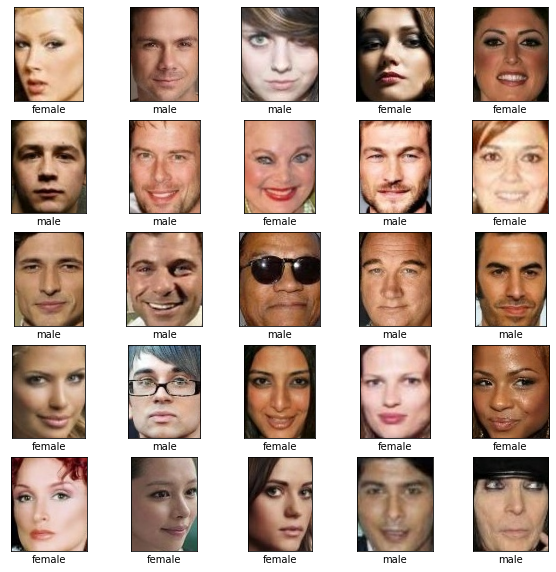

In [6]:
# Get data for male and female.
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_data.dataset.take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(train_data.index_to_label[label.numpy()])
plt.show()

In [8]:
# TensorFlow's Lite Model Maker
model = image_classifier.create(train_data, 
                                validation_data=validation_data)
model.summary()

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2562      
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
1469/1469 [==============================] - 2562s 2s/step - loss: 0.3562 - accuracy: 0.9118 - val_loss: 0.3208 - val_accuracy: 0.9356
Epoch 2/5
1469/1469 [==============================] - 2562s 2s/step - loss: 0.3436 - accuracy: 0.9198 - val_loss: 0.3206 - val_accuracy: 0.9382
Epoch 3/5
1469/1469 [==============================] - 2564s 2s/step - loss

In [9]:
# Model Evaluation
loss, accuracy = model.evaluate(test_data)
model.export(export_dir=os.getcwd())

183/183 [==============================] - 282s 2s/step - loss: 0.3167 - accuracy: 0.9385
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /tmp/tmpoh_h0aap/assets


INFO:tensorflow:Assets written to: /tmp/tmpoh_h0aap/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpocj5gslg/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpocj5gslg/labels.txt.


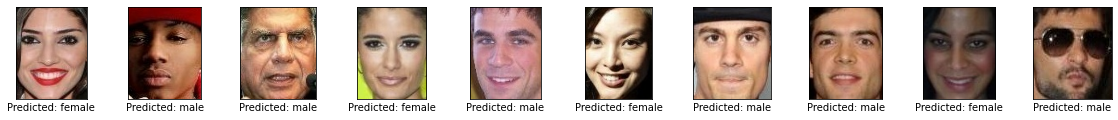

In [10]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.dataset.take(10)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [11]:
def recreate_labels():
  # 1) We use this in order to ignore any hidden files that might be here.
  # 'Datasets' is the name of the folder where we store our training data. The 'listdir' is used to fetch all the folder names.
  labels = [folder for folder in sorted(os.listdir(os.path.join('dataset', 'Training'))) if not folder.startswith('.')]
  
  # 2) Then, we output the contents of each folder name to a file.
  with open('labels.txt', 'w') as file:
    for label in labels:
      file.write(label)
      file.write('\n')

recreate_labels()

In [12]:
# Test our images with Python script from TensorFlow's example.
!wget https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/lite/examples/python/label_image.py

--2020-07-21 13:44:47--  https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/lite/examples/python/label_image.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3106 (3.0K) [text/plain]
Saving to: ‘label_image.py’

label_image.py      100%[===================>]   3.03K  --.-KB/s    in 0s      

2020-07-21 13:44:47 (35.4 MB/s) - ‘label_image.py’ saved [3106/3106]



In [14]:
# Test it automatically!
!python3 label_image.py \
  --model_file ./model.tflite \
  --label_file ./labels.txt \
  --image ./image.png

2020-07-21 13:46:24.692431: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
0.941429: male
0.058571: female
time: 64.980ms
